In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd

In [29]:
# 40명의 10장씩 사진 (112,92) => (40,10,112*92)로

In [30]:
subject=[]
ori_subject=[]
for i in range(1,41):
  path = './att_faces/s'+str(i)
  file_list = os.listdir(path)
  line=[]
  line_1=[]
  for j in range(10):
    with Image.open(path+"/"+file_list[j]) as im:
      a = np.asarray(im)
      line.append(a)
      
      a_1=a.reshape(112*92,)
      line_1.append(a_1)
  ori_subject.append(line)
  subject.append(line_1)

subject=np.asarray(subject)
ori_subject = np.asarray(ori_subject)

In [31]:
subject.shape

(40, 10, 10304)

In [32]:
# train, test 나누기 (train:35명, test:5명)

In [33]:
train=[]
ori_train=[]
test=[]
ori_test=[]

ran_list = []
train_index=[]

for i in range(40):
  ran_list.append(i)
test_index = random.sample(ran_list,5)

for i in range(5):
  test.append(subject[test_index[i]])
test=np.asarray(test)
test= test.reshape(5*10,10304)
ori_test = test.reshape(50,112,92)


for i in range(40):
  is_test=False
  for j in test_index:
    
    if i == j:
      is_test=True
      continue
  if is_test == True:
    continue
  train_index.append(i)
  train.append(subject[i])
  #print('trian index = ', i )
train=np.asarray(train)
train = train.reshape(35*10, 10304)
ori_train=train.reshape(350,112,92)

print('train index : ',train_index)
print('test index : ', test_index)
print('\n train : \n',train, '\n shape: \n ',train.shape)
print('\n test: \n',test, '\n shape: \n', test.shape)

train index :  [1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39]
test index :  [37, 20, 0, 5, 8]

 train : 
 [[ 35  36  37 ... 144 147 143]
 [ 37  34  38 ... 135 143 133]
 [ 37  35  35 ...  26  28  28]
 ...
 [129 127 133 ...  93  93  93]
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]] 
 shape: 
  (350, 10304)

 test: 
 [[109 112 114 ...  69  72  69]
 [108 105 104 ...  72  73  48]
 [104 106 107 ...  65  59  73]
 ...
 [112 109 116 ...  93  88  92]
 [111 114 112 ...  88  86  92]
 [110 112 113 ...  92  87  90]] 
 shape: 
 (50, 10304)


In [34]:
# sklearn의 PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=10)

In [37]:
pca.fit(train)

PCA(n_components=10)

In [38]:
test_reduced = pca.fit_transform(test)
test_reduced.shape

(50, 10)

In [39]:
test_recovered = pca.inverse_transform(test_reduced)
test_recovered.shape

(50, 10304)

In [40]:
test_recovered = test_recovered.reshape((50,112,92),)
test_recovered.shape

(50, 112, 92)

In [41]:
def plot_test(test, people, m):
    fig, axes=plt.subplots(people,m)
    for i in range(people*m):
        for image, ax in zip(test.astype(np.float32), axes.ravel()):
            ax.imshow(image)
    plt.show

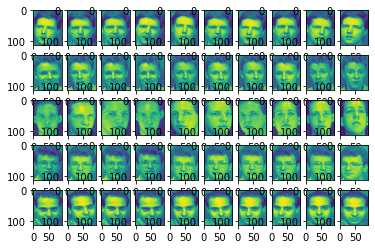

In [42]:
plot_test(ori_test,5,10)

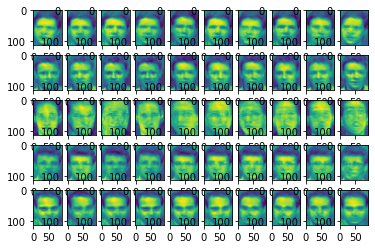

In [43]:
plot_test(test_recovered,5,10)

In [44]:
# PCA

In [45]:
class PrincipalComponentAnalysis():

    
    def __init__(self, n_components):
        #n_components : 데이터를 축소시킬 목표 차원
        self.n_components = n_components
        # eigen vector matrix
        self.eigen_mat = None
        # eigen value matrix (후에 크기별로 정렬할때 필요)
        self.eigen_val = None
        # n_components 만큼큼
        self.reduced_eigen_mat = None
        
    def fit(self, x):
        # data를 zero centered
        x = x - np.mean(x, axis=0, keepdims=True)
        
        n, d = x.shape
        cov = np.matmul(x.T, x)/n
        
        eigvals, eigvecs = np.linalg.eig(cov)
        eig_pairs = [(eigvals[i], eigvecs[:, i]) for i in range(d)]
        sorted_eig = sorted(eig_pairs, key=lambda tup: tup[0], reverse=True)
        
        self.eigen_mat = np.stack(list(map(lambda tup: tup[1], sorted_eig)), axis=1)
        self.eigen_val = np.array(list(map(lambda tup: tup[0], sorted_eig)))
        
    def transform(self, x):
        
        x = x - np.mean(x, axis=0, keepdims=True)
        
        self.reduced_eigen_mat = self.eigen_mat[:, :self.n_components]
        
        results = np.matmul(x, self.reduced_eigen_mat)
        
        return results
    
    def reconstruct(self, data, x_transformed) :
        y = np.matmul(x_transformed, self.reduced_eigen_mat.T)+np.mean(data, axis=0, keepdims=True)
        y = y.reshape(y.shape[0],112,92)

        return y

In [46]:
pca = PrincipalComponentAnalysis(n_components=10)

In [47]:
pca.fit(train)

In [48]:
test_transformed = pca.transform(test)
print(test_transformed,test_transformed.shape)

[[-1057.73313945+0.j   209.26220093+0.j    60.77461416+0.j
   1729.69448683+0.j  -677.18413942+0.j   -68.58343982+0.j
    116.8099639 +0.j   309.31049336+0.j   -48.23051003+0.j
    223.84726477+0.j]
 [-1286.3945671 +0.j  -109.75988604+0.j   161.54512153+0.j
    993.19782655+0.j  -973.62839836+0.j    70.98617984+0.j
    611.81515438+0.j  -166.28325602+0.j    54.37698149+0.j
   -326.54591702+0.j]
 [-1162.73751661+0.j    43.40645755+0.j    33.71234943+0.j
   1149.06891397+0.j  -809.92790454+0.j  -385.71425858+0.j
    430.44521588+0.j  -350.83839097+0.j   -95.01667518+0.j
   -737.73873344+0.j]
 [ -965.77036195+0.j  -613.98977846+0.j   101.73691963+0.j
   1839.48701617+0.j  -769.87493599+0.j  -743.33272589+0.j
    453.18082514+0.j   -18.14467543+0.j   -46.78681016+0.j
   -576.84507063+0.j]
 [ -535.64371676+0.j   365.22481873+0.j  -427.13180644+0.j
    504.42892818+0.j -1365.06273799+0.j -1018.71560845+0.j
   -462.15460654+0.j   105.39037314+0.j  -254.58889703+0.j
   -599.52076411+0.j]
 [-12

In [49]:
print(pca.reduced_eigen_mat,pca.reduced_eigen_mat.shape)

[[ 0.00130919+0.j  0.01258579+0.j  0.02178344+0.j ... -0.00748495+0.j
   0.00013998+0.j  0.00650218+0.j]
 [ 0.00128688+0.j  0.01248115+0.j  0.02190547+0.j ... -0.00725806+0.j
   0.00057988+0.j  0.00580147+0.j]
 [ 0.00132604+0.j  0.01260536+0.j  0.02174104+0.j ... -0.00688484+0.j
   0.0006512 +0.j  0.00588425+0.j]
 ...
 [-0.00656174+0.j -0.01476204+0.j  0.01002866+0.j ...  0.01662176+0.j
  -0.00337937+0.j  0.00333776+0.j]
 [-0.0056465 +0.j -0.01370844+0.j  0.01044123+0.j ...  0.01569582+0.j
  -0.00434113+0.j  0.00567513+0.j]
 [-0.00662642+0.j -0.01270193+0.j  0.01124164+0.j ...  0.01390927+0.j
  -0.00504625+0.j  0.00506296+0.j]] (10304, 10)


In [91]:
# Eigen Face

In [50]:
eigen_face=pca.reduced_eigen_mat.T.reshape(10,112,92)
eigen_face.shape

(10, 112, 92)

<ipython-input-53-5fc596ab93c5>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plot_test(eigen_face.astype(np.float32),2,5)


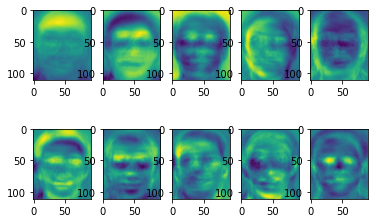

In [53]:
plot_test(eigen_face.astype(np.float32),2,5)

In [54]:
test_reconstruct = pca.reconstruct(test,test_transformed)

In [55]:
print(test_reconstruct, test_reconstruct.shape)

[[[129.77089708+0.j 130.13154154+0.j 129.46784982+0.j ...
   118.77691621+0.j 120.03246338+0.j 119.24518466+0.j]
  [129.26186808+0.j 129.65644608+0.j 128.7340902 +0.j ...
   120.01557688+0.j 120.0845934 +0.j 119.70707859+0.j]
  [130.74928403+0.j 129.07323904+0.j 129.57279731+0.j ...
   120.22493057+0.j 120.35993837+0.j 119.59702626+0.j]
  ...
  [117.36863831+0.j 123.55029145+0.j 124.47433432+0.j ...
    76.15572951+0.j  75.88038774+0.j  75.68328566+0.j]
  [129.28252652+0.j 131.80616133+0.j 137.68720471+0.j ...
    78.98715263+0.j  76.90636467+0.j  79.33911213+0.j]
  [137.17621118+0.j 143.54662548+0.j 147.98995252+0.j ...
    77.93038618+0.j  76.5659527 +0.j  80.08083541+0.j]]

 [[114.86239087+0.j 115.42685383+0.j 114.66602219+0.j ...
   104.90148696+0.j 105.88175199+0.j 105.40750102+0.j]
  [114.76883391+0.j 114.94804634+0.j 114.26480598+0.j ...
   106.06497339+0.j 106.15347706+0.j 106.2040007 +0.j]
  [115.83916481+0.j 114.16247387+0.j 114.76320554+0.j ...
   106.2886263 +0.j 106.508057

In [56]:
print('test_reconstruct.shape : ',test_reconstruct.shape)
print('test_shape : ', ori_test.shape)

test_reconstruct.shape :  (50, 112, 92)
test_shape :  (50, 112, 92)


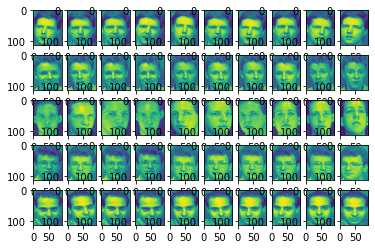

In [57]:
plot_test(ori_test.astype(np.float32),5,10)

<ipython-input-58-5b7d3898e2e0>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plot_test(test_reconstruct.astype(np.float32), 5, 10)


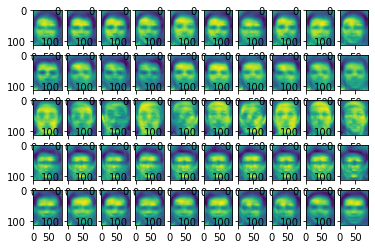

In [58]:
plot_test(test_reconstruct.astype(np.float32), 5, 10)

In [ ]:
# gallery, query롤 나누기

In [68]:
def split_gallery_query(test_transformed):
    test_transformed = test_transformed.reshape(5,10,10)
    print('test transformed shape : ', test_transformed.shape)
    gallery_trans=[]
    query_trans=[]
    for i in range(5):
        #gallery_trans.append(i+1)
        for j in range(10):
            if j < 7:
                gallery_trans.append(test_transformed[i][j])
            else :
                query_trans.append(test_transformed[i][j])

    gallery_trans=np.asarray(gallery_trans)
    query_trans=np.asarray(query_trans)
    print('gallery : \n',gallery_trans,'\n gallery shape : \n', gallery_trans.shape)
    print('query : \n',query_trans,'\n query shape : \n', query_trans.shape)
    return gallery_trans, query_trans

In [69]:
gallery_trans, query_trans = split_gallery_query(test_transformed)

test transformed shape :  (5, 10, 10)
gallery : 
 [[-1057.73313945+0.j   209.26220093+0.j    60.77461416+0.j
   1729.69448683+0.j  -677.18413942+0.j   -68.58343982+0.j
    116.8099639 +0.j   309.31049336+0.j   -48.23051003+0.j
    223.84726477+0.j]
 [-1286.3945671 +0.j  -109.75988604+0.j   161.54512153+0.j
    993.19782655+0.j  -973.62839836+0.j    70.98617984+0.j
    611.81515438+0.j  -166.28325602+0.j    54.37698149+0.j
   -326.54591702+0.j]
 [-1162.73751661+0.j    43.40645755+0.j    33.71234943+0.j
   1149.06891397+0.j  -809.92790454+0.j  -385.71425858+0.j
    430.44521588+0.j  -350.83839097+0.j   -95.01667518+0.j
   -737.73873344+0.j]
 [ -965.77036195+0.j  -613.98977846+0.j   101.73691963+0.j
   1839.48701617+0.j  -769.87493599+0.j  -743.33272589+0.j
    453.18082514+0.j   -18.14467543+0.j   -46.78681016+0.j
   -576.84507063+0.j]
 [ -535.64371676+0.j   365.22481873+0.j  -427.13180644+0.j
    504.42892818+0.j -1365.06273799+0.j -1018.71560845+0.j
   -462.15460654+0.j   105.39037314+

In [66]:
# gallery query scatter

<ipython-input-70-7d15d694fa31>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  x=gallery_trans[:,0].astype(np.float32)
<ipython-input-70-7d15d694fa31>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  y=gallery_trans[:,1].astype(np.float32)
<ipython-input-70-7d15d694fa31>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  z=gallery_trans[:,2].astype(np.float32)
<ipython-input-70-7d15d694fa31>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  x1=query_trans[:,0].astype(np.float32)
<ipython-input-70-7d15d694fa31>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  y1=query_trans[:,1].astype(np.float32)
<ipython-input-70-7d15d694fa31>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  z1=query_trans[:,2].astype(np.float32)


<Figure size 960x960 with 0 Axes>

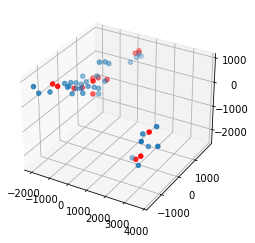

In [70]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8, 8), dpi=120)

fig = plt.figure()
ax = fig.gca(projection='3d')

x=gallery_trans[:,0].astype(np.float32)
y=gallery_trans[:,1].astype(np.float32)
z=gallery_trans[:,2].astype(np.float32)

x1=query_trans[:,0].astype(np.float32)
y1=query_trans[:,1].astype(np.float32)
z1=query_trans[:,2].astype(np.float32)

ax.scatter(x,y,z)
ax.scatter(x1,y1,z1, c='red')

plt.show()

In [ ]:
# knn으로 뿌려서 정확도 계산

In [89]:
def knn_accuracy(gallery_trans, query_trans, knn_num):
    gallery_trans = gallery_trans.reshape(1,35,10)
    query_trans = query_trans.reshape(15,1,10)

    # query gallery 거리 찾기
    distance = np.sum(np.square(query_trans-gallery_trans),axis=-1)
    #print(distance, distance.shape)

    # sorting하여 가까운 사진 index로 정렬
    sort_distance = np.argsort(distance, axis=1).reshape(5,3,35)
    #print(sort_distance, sort_distance.shape)

    # knn 10개
    knn = sort_distance[:,:,:knn_num]//7
    #print(knn, knn.shape)
    knn = knn.reshape(15,10)


    # count[0] = 1번 사람이라고 예측한 수
    count = []

    for row in knn:
        # knn행별로 사람 플러스 해줄 임시 배열
        temp = [0 for i in range(5)]
        for j in range(10):
            temp[row[j]]+=1
        count.append(temp)
    count=np.asarray(count).reshape(5,3,5)
    #print(count, count.shape)

    # 정확도
    accuracy = (np.sum(count, axis=1)/30)*100
    
    accuracy = pd.DataFrame(accuracy, columns=['1','2','3','4','5'], index=['1','2','3','4','5'])

    
    return accuracy

In [90]:
accuracy = knn_accuracy(gallery_trans, query_trans, 10)
accuracy

,1,2,3,4,5
1,66.666667,0.000000,0.000000,0.000000,33.333333
2,10.000000,66.666667,0.000000,0.000000,23.333333
3,0.000000,3.333333,70.000000,16.666667,10.000000
4,10.000000,3.333333,3.333333,70.000000,13.333333
5,46.666667,3.333333,0.000000,0.000000,50.000000
